In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("dating.csv")
data_male = data[data['gender'] == 0]
data_female = data[data['gender'] == 1]

In [71]:
preference_scores_participant = ['attractive_important','sincere_important', 'intelligence_important', 'funny_important','ambition_important', 'shared_interests_important']
male_means = []
female_means = []
for col in preference_scores_participant:
    male_means.append(data_male[col].mean())
    female_means.append(data_female[col].mean())

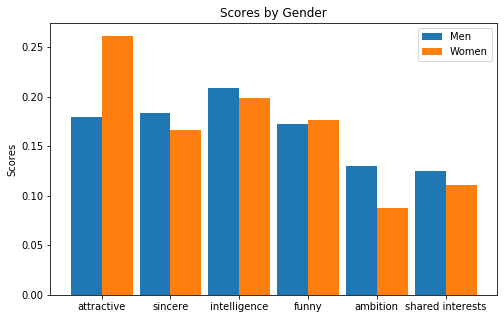

In [72]:
labels = ['attractive', 'sincere', 'intelligence', 'funny', 'ambition', 'shared interests']
x = np.arange(len(labels))
width = 0.45

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, male_means, width, label='Men')
rects2 = ax.bar(x + width/2, female_means, width, label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

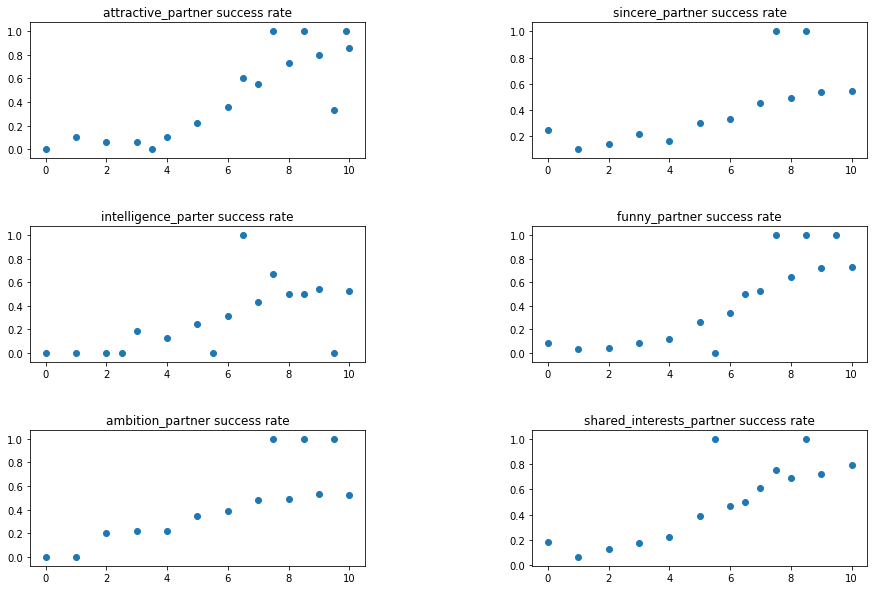

In [152]:
rating_partner_from_participant = ['attractive_partner', 'sincere_partner', 'intelligence_parter', 'funny_partner', 'ambition_partner', 'shared_interests_partner']
fig = plt.figure(figsize = (15,10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for ix,col in enumerate(rating_partner_from_participant):
    total_count = data.groupby(col)['decision'].count()
    success_count = data[data['decision'] ==1].groupby(col)['decision'].count()
    success_ratio = (success_count/total_count).fillna(0)
    ax = fig.add_subplot(3, 2, ix+1)
    ax.scatter(success_ratio.index.tolist(), success_ratio.values.tolist())
    ax.set_title(col + ' success rate')